In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

In [5]:
data = pd.read_csv('../train/train.csv')
data = data.drop(['Day'], axis=1)
data['Time'] = data['Minute'].replace(30, 0.5) + data['Hour']
data = data.drop(['Hour', 'Minute'], axis=1)

In [7]:
adfuller_test = adfuller(data['TARGET'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -13.533785740088112
p-value: 2.591136847021616e-25


In [33]:
train = data

In [41]:
forecasting_model = VAR(train)
results_aic = []
for p in range(1,10):
    results = forecasting_model.fit(p)
    results_aic.append(results.aic)

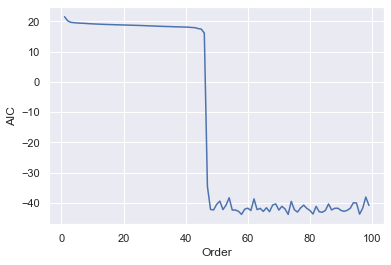

In [15]:
sns.set()
plt.plot(list(np.arange(1,10,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [42]:
df_differenced = train.diff().dropna()

In [49]:
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
        adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")
        
adf_test(df_differenced["TARGET"])
adf_test(train["TARGET"])

Test Statistic            -50.600668
p-value                     0.000000
# Lags                     57.000000
# Observations          52501.000000
Critical Value (1%)        -3.430475
Critical Value (5%)        -2.861595
Critical Value (10%)       -2.566799
dtype: float64
 Series is Stationary
Test Statistic         -1.353379e+01
p-value                 2.591137e-25
# Lags                  5.500000e+01
# Observations          5.250400e+04
Critical Value (1%)    -3.430475e+00
Critical Value (5%)    -2.861595e+00
Critical Value (10%)   -2.566799e+00
dtype: float64
 Series is Stationary


In [43]:
model = VAR(df_differenced) 
results = model.fit(maxlags = 15, ic = 'aic') 
results.summary ()

C:\Users\Eavn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 22, Jan, 2021
Time:                     15:25:19
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    19.4975
Nobs:                     52544.0    HQIC:                   19.4114
Log likelihood:      -1.03010e+06    FPE:                2.58974e+08
AIC:                      19.3722    Det(Omega_mle):     2.55346e+08
--------------------------------------------------------------------
Results for equation DHI
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.001100         0.217634           -0.005           0.996
L1.DHI            -0.419306         0.006351          -66.027           0.000
L1.DNI            -0.015813         0.003325           -4.756           0.

In [28]:
laaged_values = train.values[-7:]
forecast = pd.DataFrame(results.forecast(y= laaged_values, steps=96), columns=train.columns)
forecast[0:48]


,DHI,DNI,WS,RH,T,TARGET,Time
48,25.708946,166.191517,2.439842,60.391690,-0.788243,8.024075,12.708216
49,24.549921,163.480258,2.438612,60.765615,-0.882719,7.784512,12.493440
50,23.837893,162.231948,2.440259,61.058148,-0.954517,7.668253,12.274713
51,23.563294,162.402382,2.444602,61.266889,-1.002516,7.671818,12.056111
52,23.709200,163.926839,2.451392,61.392515,-1.026473,7.790135,11.842378
53,24.253765,166.717119,2.460384,61.435765,-1.026200,8.016493,11.636901
54,25.169009,170.667408,2.471282,61.399967,-1.002263,8.342753,11.443395
55,26.422894,175.653364,2.483798,61.288693,-0.955348,8.759378,11.264394
56,27.978645,181.537944,2.497611,61.107608,-0.886771,9.255678,11.102561
57,29.796580,188.172033,2.512413,60.862622,-0.797970,9.819922,10.959551


No handles with labels found to put in legend.


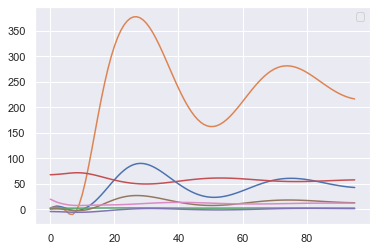

In [40]:
plt.plot(forecast)
plt.legend()

In [15]:
forecast["realgdp_forecasted"] = mydata["realgdp"].iloc[-10-1] + forecast['realgdp_1d'].cumsum()
forecast["realdpi_forecasted"] = mydata["realdpi"].iloc[-10-1] + forecast['realdpi_1d'].cumsum() 
forecast

,realgdp_1d,realdpi_1d,realgdp_forecasted,realdpi_forecasted
year,,,,
2007.0,61.872982,47.739232,13161.773982,9877.939232
2007.0,53.948996,41.742951,13215.722978,9919.682183
2007.0,56.171082,42.552316,13271.894060,9962.234500
2008.0,54.953081,42.023999,13326.847141,10004.258499
2008.0,55.109616,42.001007,13381.956757,10046.259506
2008.0,54.865410,41.937065,13436.822166,10088.196571
2008.0,54.841362,41.893996,13491.663528,10130.090566
2009.0,54.775171,41.878378,13546.438699,10171.968945
2009.0,54.754309,41.859837,13601.193008,10213.828781


C:\Users\Eavn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Eavn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


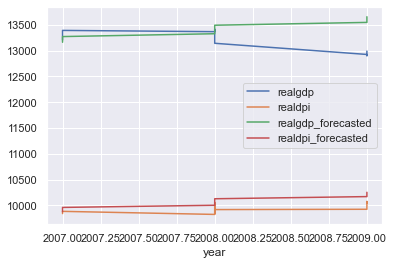

In [16]:
test = mydata.iloc[-10:,:]
test["realgdp_forecasted"] = forecast["realgdp_forecasted"]
test["realdpi_forecasted"] = forecast["realdpi_forecasted"]
test.plot()